In [17]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [18]:
import seaborn as sns
import tensorflow as tf
import pandas as pd
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score

A bit of a good practice is to put the variables here, after importing the libraries. This way it will bea easier to find where to modify the values for our model. 

In [19]:
DATA_PATH = 'Date_Fruit_Datasets/Date_Fruit_Datasets.xlsx'

# Load the data

Load the dataset found in DATA_PATH using pandas. Then gather a bit of info about the dataset and its classes.

In [20]:
df = pd.read_excel(DATA_PATH)
df

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.9080,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.1440,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.3940,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.2100,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.3540,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,255403,1925.3650,691.8453,477.1796,0.7241,570.2536,0.9785,261028,0.7269,1.4499,...,2.2423,2.3704,2.7202,-25296416768,-19168882688,-18473392128,49.0869,43.0422,42.4153,SOGAY
894,365924,2664.8230,855.4633,551.5447,0.7644,682.5752,0.9466,386566,0.6695,1.5510,...,3.4109,3.5805,3.9910,-31605219328,-21945366528,-19277905920,46.8086,39.1046,36.5502,SOGAY
895,254330,1926.7360,747.4943,435.6219,0.8126,569.0545,0.9925,256255,0.7240,1.7159,...,2.2759,2.5090,2.6951,-22242772992,-19594921984,-17592152064,44.1325,40.7986,40.9769,SOGAY
896,238955,1906.2679,716.6485,441.8297,0.7873,551.5859,0.9604,248795,0.6954,1.6220,...,2.6769,2.6874,2.7991,-26048595968,-21299822592,-19809978368,51.2267,45.7162,45.6260,SOGAY


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

In [22]:
df['Class'].unique()

array(['BERHI', 'DEGLET', 'DOKOL', 'IRAQI', 'ROTANA', 'SAFAVI', 'SOGAY'],
      dtype=object)

## Data preprocessing

After gathering our dataset in the previous step, we need to label encode our target variables. This means that we are going to encode our unique labels (= classes) with values between 0 and n_classes-1. In this case we have 7 unique labels, which means that the we will be getting values from 0 to 6. 
<br>
The next step is to split into train and test sets for training. That way we can test our model with unseen data after it finished training.

In [23]:
le = LabelEncoder()

y = df['Class']
y = le.fit_transform(y) # Encoded labels

In [24]:
X = df.iloc[:,:-1] # Select all but the last column

In [25]:
# Split into train test sets
# TEST_SIZE is the variable which determines the % of the test set we are getting
X_train, X_test, y_train, y_test = train_test_split(
                                                    X, 
                                                    y, 
                                                    test_size=TEST_SIZE, 
                                                    random_state=RANDOM_STATE,
                                                    shuffle=True)

In [26]:
# shape of the dataset
print('Shape of training data :',X_train.shape)
print('Shape of testing data :',X_test.shape)

Shape of training data : (601, 34)
Shape of testing data : (297, 34)


# Extreme Gradient Boosting Classifier (XGBoost)
XGBoost is a boosted tree based ensemble classifier which means it works similar to the RandomForest algorithm we have already used at some point of our learning path. What makes this algorithm interesting is that it will automatically reduce the feature set. However, it is known to be a slow algorithm. However, we are going to use a GPU so this should not be a problem. Let's try it out and measure the time of execution.

## XGBoost algorithm definition

We define the algorithm choosing the best hyper params we have found after several tests. If you want to find out more about XGBoost, click [here](https://xgboost.readthedocs.io/en/latest/index.html)

In [27]:
### Define our XGBoost model with parameters:
# Variables:
# random_state: seed to the random generator, so that your train-test splits are always deterministic
# learning_rate: Step size shrinkage used in update to prevents overfitting. 
#               After each boosting step, we can directly get the weights of new features, 
#               and learning_rate shrinks the feature weights to make the boosting process more conservative.
# booster: Which booster to use. Can be gbtree, gblinear or dart
# nthread: default to maximum number of threads available if not set
# eval_metric: Evaluation metrics for validation data, a default metric will be assigned according to objective 
#               (rmse for regression, and logloss for classification, mean average precision for ranking). Multiple can be used
# verbosity: printing messages. If 0, nothing is shown
RANDOM_STATE = 42
LR = 0.01
TEST_SIZE = 0.33
MAX_DEPTH = 0
NTHREAD = 2
EVAL_METRIC = 'mlogloss'
BOOSTER = 'gbtree'
VERBOSITY = 1
model = xgb.XGBClassifier(
                        random_state=RANDOM_STATE,
                        learning_rate=LR,
                        booster=BOOSTER,
                        nthread=NTHREAD,
                        eval_metric=EVAL_METRIC,
                        verbosity=VERBOSITY
                        )

# Train

We want to measure the time the algoritm needs to finish training. We are calculating the time by getting the actual time and the time it is when the training is done. Then we can compute how much time it needed for the execution.

In [28]:
import time
start = time.time() # Time before training

# Fit the model with the training data
model.fit(X_train, y_train)

end = time.time() # Time after training

# Compute how much time the model need to train
print(f'Training took {round(end-start,2)} seconds to be completed!')

Training took 1.96 seconds to be completed!


# Getting the metrics

First we are going to check the performance of our model by getting the accuracy of the model. Afterwards we are computing the recall and f1-score metrics on the test set. Finally we will plot a confusion matrix to see what labels are failing the most.

In [29]:
# predict the target on the train dataset
predict_train = model.predict(X_train)
 
# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train,predict_train)
print('\naccuracy_score on train dataset : ', accuracy_train)
 
# predict the target on the test dataset
predict_test = model.predict(X_test)
 
# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('\naccuracy_score on test dataset : ', accuracy_test)


accuracy_score on train dataset :  0.9866888519134775

accuracy_score on test dataset :  0.8720538720538721


In [30]:
recall_score = round(recall_score(y_test,predict_test,average='macro'), 2)
f1_score = round(f1_score(y_test,predict_test,average='macro'), 2)
print(f'The accuracy in the test set was {round(accuracy_test, 2)}, the recall was {recall_score} and the f1 score was {f1_score}')

The accuracy in the test set was 0.87, the recall was 0.84 and the f1 score was 0.83


Text(0.5, 1.0, 'Confusion Matrix')

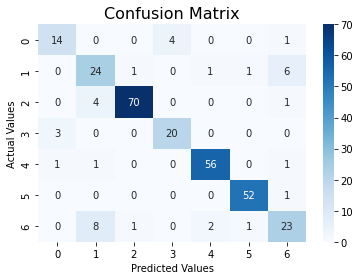

In [31]:
confusion_matrix = confusion_matrix(y_test, predict_test)
cm_plot = sns.heatmap(confusion_matrix,
                      annot=True, 
                      cmap='Blues',
                      fmt='d');
cm_plot.set_xlabel('Predicted Values')
cm_plot.set_ylabel('Actual Values')
cm_plot.set_title('Confusion Matrix', size=16)

In [32]:
ada_clf=AdaBoostClassifier()
import time
start = time.time() # Time before training

# Fit the model with the training data
ada_clf.fit(X_train, y_train)

end = time.time() # Time after training

# Compute how much time the model need to train
print(f'Training took {round(end-start,2)} seconds to be completed!')

Training took 0.3 seconds to be completed!


In [33]:
# predict the target on the train dataset
predict_train = ada_clf.predict(X_train)

# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train,predict_train)
print('\naccuracy_score on train dataset : ', accuracy_train)
 
# predict the target on the test dataset
predict_test = ada_clf.predict(X_test)

 
# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('\naccuracy_score on test dataset : ', accuracy_test)


accuracy_score on train dataset :  0.5524126455906821

accuracy_score on test dataset :  0.5185185185185185
